# Objective

Analyze average total body NNDs with amphora 86-93 as reference. 

New visualization types:
- Set average NNDs as negative if the jar is smaller than 86-93.
- Show max diameters (when available) alongside average NNDs

# Notes on Max Diameter and Capacity Data

All capacity data is physically measured data. Most max diameter data is physically measured data. 

Since physically measured max diameters were unavailable for the wide band jars, these measurements were taken using CloudCompare. When I checked the jars that have physically measured diameters available, to see whether these physically measured diameters match with the diameter measurements from CloudCompare, I found that max diameters found in CloudCompare are for some reason consistently 1 mm less than physically measured diameters. Therefore, to get the max diameters shown here for the wide band jars, I added 1 mm to the max diameters I found in CloudCompare.

# Results

All checks out logically. Major takeaways:
- When average NNDs are set as negative (if the jar is smaller than 86-93), groups stay together, and in fact groupings by type/color are more tightly distributed than they were before.
    - This might be a more intuitive way of presenting the data.
- Delta diameter and capacity seem to parallel NND in varying with the reference jar.

In [2]:
import sys
sys.path.insert(0,'../../../')
import util
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
%load_ext autoreload
%autoreload 2

# Inputs

In [3]:
compare = ['83-2',
            '84-1',
            '84-3',
            '84-10',
            '86-38',
            '86-75',
            '86-85',
            '86-90',
            '86-92',
            '86-95',
            '86-96',
            '86-99',
            '86-100',
            '86-113',
            'C',
            'D',
            'F',
            'UN16',
            'W1',
            'W8',
            'W43',
            'W55',
            'W63',
            'W69',
            'W70',
            'W74',
            'W77',
            'X5',
            'X12',
            'Y2',
            'Y7',
            'Y11',
            'Y12',
            'Y14',
            'Y15',
            'Y22',
            'Y28',
            'Y32',
            'Y34',
            'Y39',
            'Y45',
            'Y52',
            'Y114',
            'Y123',
            'Y126',
            'Y127',
            'Y128',
            'Y135',
            'Y148',
            'Y149']
ref = '86-93'
path_to_models = './bodies_registered/'
path_to_ref = './body_reference/'
save_distances = True
ref_csv_path = './body_reference_cleaned/YA7_' + ref + '_body.csv'

# Comparison

Calculated average NNDs if not previously calculated.

In [4]:
average_distances = []
stdev_distances = []
for model in compare:
    
    print(model) # so the user can see which segment the code is working on
    
    model_csv_path = './bodies_registered_cleaned/YA7_' + model + '_body.csv'
    dist_path = './bodies_distances/' + ref + '_' + model + '_distances.csv'
    
    average_distance, stdev_distance = util.get_avg_cc_dist(ref_csv_path, model_csv_path, save_distances, dist_path)
    
    average_distances.append(average_distance)
    stdev_distances.append(stdev_distance)

Load average NNDs if previously calculated.

In [7]:
average_distances = np.genfromtxt('average_distances_8693.csv', delimiter=',')

Load physical and measured data.

In [4]:
group_data = pd.read_csv('../../../bodies_to_86-93/bodies_group_data_8693.csv', index_col=0)

In [5]:
diameter_8693 = 42.3
capacity_8693 = 36.5

In [8]:
average_distances_signed = []
for distance, diameter in zip(average_distances, list(group_data.diameter)):
    if diameter < diameter_8693:
        average_distances_signed.append(distance*-1)
    else:
        average_distances_signed.append(distance)

# Morphological difference with 86-93 across the dataset

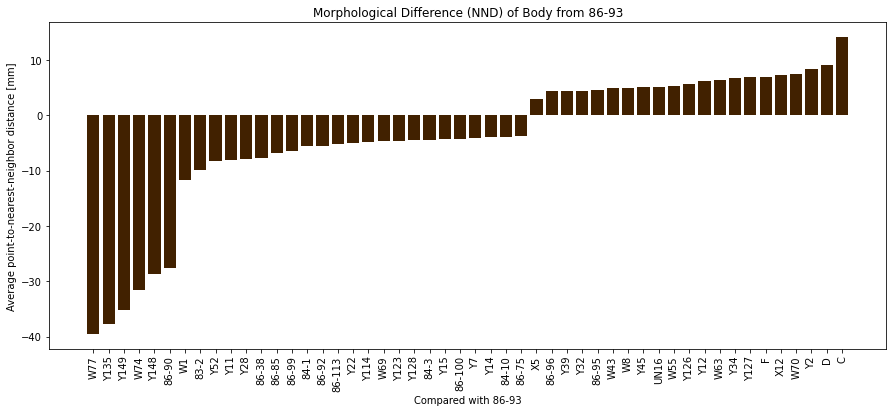

In [9]:
# order the compared amphoras by avg NND to ref amphora
compare_sorted = [x for _,x in sorted(zip(average_distances_signed, compare))]
average_distances_sorted = sorted(average_distances_signed)

fig, ax = plt.subplots(figsize = (15, 6))
x_pos = np.arange(len(compare_sorted))
ax.bar(x_pos, average_distances_sorted, color='#412100')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_xlabel('Compared with %s' % ref)
ax.set_ylabel('Average point-to-nearest-neighbor distance [mm]')
ax.set_title('Morphological Difference (NND) of Body from %s' % ref)
plt.xticks(rotation='vertical')
plt.show()

# Coloring by group

#### Assign a color to each group.

In [10]:
color_dict = {'Spiral combed - main group': '#412100',
              'Spiral combed - main group - ring lip': 'xkcd:violet',
              'Spiral combed - fractional': 'xkcd:tan',
              'Spiral combed - massive neck, massive diagonal handles': 'xkcd:red',
              'Spiral combed - massive neck, massive vertical handles': 'xkcd:orange',
              'Spiral combed - outlier?': 'xkcd:green',
              'Wide band of combing/squared handles': 'xkcd:blue' 
             }

In [11]:
labels = list(group_data.group)
colors = [color_dict[label] for label in labels]

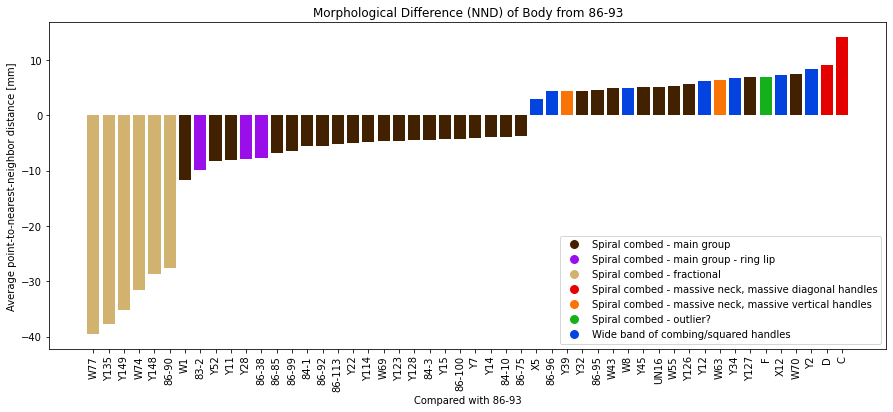

In [12]:
colors_sorted = [x for _,x in sorted(zip(average_distances_signed, colors))]

fig, ax = plt.subplots(figsize = (15, 6))
x_pos = np.arange(len(compare_sorted))
ax.bar(x_pos, average_distances_sorted, color=colors_sorted)
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_xlabel('Compared with %s' % ref)
ax.set_ylabel('Average point-to-nearest-neighbor distance [mm]')
ax.set_title('Morphological Difference (NND) of Body from %s' % ref)
plt.xticks(rotation='vertical')

handle_list = []
for label in color_dict:
    handle_list.append(Line2D([0],[0], marker='o', color='w', markersize=10,
                              markerfacecolor=color_dict[label], label=label))

plt.legend(handles=handle_list, loc='lower right')

plt.show()

#### Note: The two plots in this notebook are the same. The second one is simply colorized for ease of interpretation.

## Get absolute and delta max diameters

In [13]:
diameters = list(group_data.diameter)
diameters_signed = []
for diameter in diameters:
    if diameter < diameter_8693:
        diameters_signed.append(diameter*-1)
    else:
        diameters_signed.append(diameter)
diameters_sorted = [x for _,x in sorted(zip(average_distances_signed, diameters_signed))]
diameters_sorted_deltas = [abs(x) - diameter_8693 for x in diameters_sorted]

## Get absolute and delta capacities

In [14]:
capacities = list(group_data.capacity)
capacities_signed = []
for capacity in capacities:
    if capacity < capacity_8693:
        capacities_signed.append(capacity*-1)
    else:
        capacities_signed.append(capacity)
capacities_sorted = [x for _,x in sorted(zip(average_distances_signed, capacities_signed))]

capacities_sorted_deltas = []
for x in capacities_sorted:
    if x==0:
        capacities_sorted_deltas.append(0)
    else:
        capacities_sorted_deltas.append(abs(x) - capacity_8693)

# Plot with max diameter (and without capacity)

Excluding capacity since capacity is not available for all jars. Scroll further for plot that includes max diameter and capacity.

In [15]:
diameters = list(group_data.diameter)
diameters_signed = []
for diameter in diameters:
    if diameter < diameter_8693:
        diameters_signed.append(diameter*-1)
    else:
        diameters_signed.append(diameter)
diameters_sorted = [x for _,x in sorted(zip(average_distances_signed, diameters_signed))]

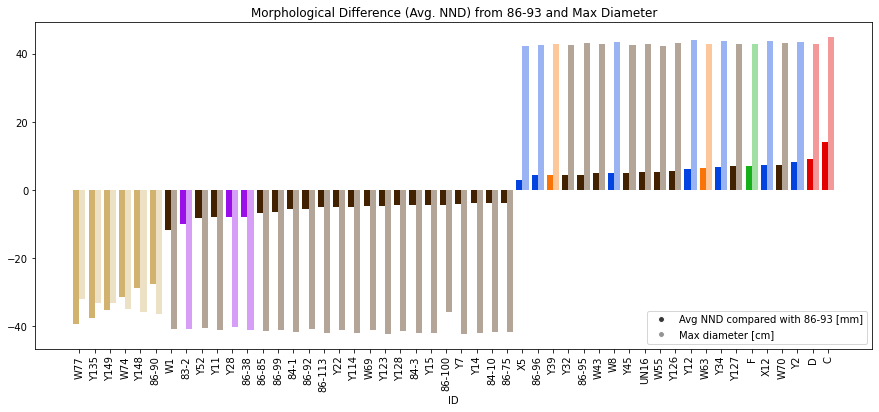

In [16]:
fig, ax = plt.subplots(figsize=(15,6))
x_pos = np.arange(len(compare_sorted))

w = 0.4
s = 0.2

ax.bar(x_pos-s, average_distances_sorted,width=w,color=colors_sorted,align='center')
ax.bar(x_pos+s, diameters_sorted,width=w,color=colors_sorted,alpha=0.4,align='center')

handle_list = [Line2D([0],[0], marker='o', color='w', markerfacecolor='xkcd:dark grey', label='Avg NND compared with 86-93 [mm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor='xkcd:grey', label='Max diameter [cm]')]
plt.legend(handles=handle_list, loc='lower right')
plt.xlabel('ID')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_title('Morphological Difference (Avg. NND) from 86-93 and Max Diameter')
plt.xticks(rotation='vertical')
plt.show()

# Plot with delta max diameter (and without delta capacity)

Excluding delta capacity since capacity is not available for all jars. Scroll further for plot that includes delta max diameter and delta capacity.

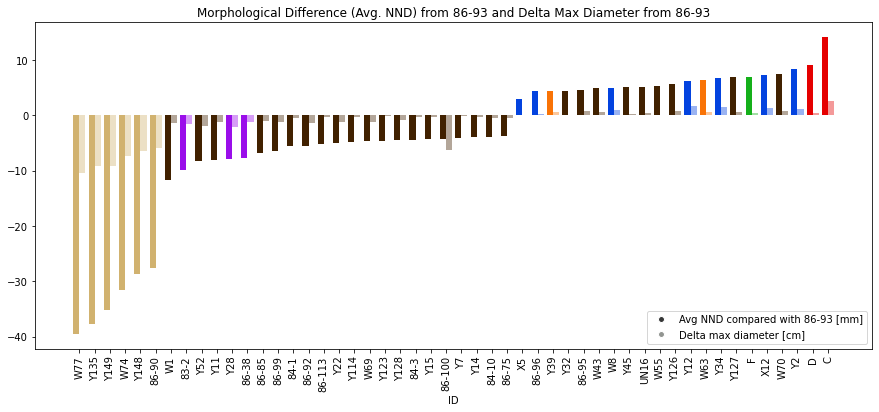

In [18]:
fig, ax = plt.subplots(figsize=(15,6))
x_pos = np.arange(len(compare_sorted))

w = 0.4
s = 0.2

ax.bar(x_pos-s, average_distances_sorted,width=w,color=colors_sorted,align='center')
ax.bar(x_pos+s, diameters_sorted_deltas,width=w,color=colors_sorted,alpha=0.4,align='center')

handle_list = [Line2D([0],[0], marker='o', color='w', markerfacecolor='xkcd:dark grey', label='Avg NND compared with 86-93 [mm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor='xkcd:grey', label='Delta max diameter [cm]')]
plt.legend(handles=handle_list, loc='lower right')
plt.xlabel('ID')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_title('Morphological Difference (Avg. NND) from 86-93 and Delta Max Diameter from 86-93')
plt.xticks(rotation='vertical')
plt.show()

# Plot with max diam and capacity

(Capacity data presented wherever available)

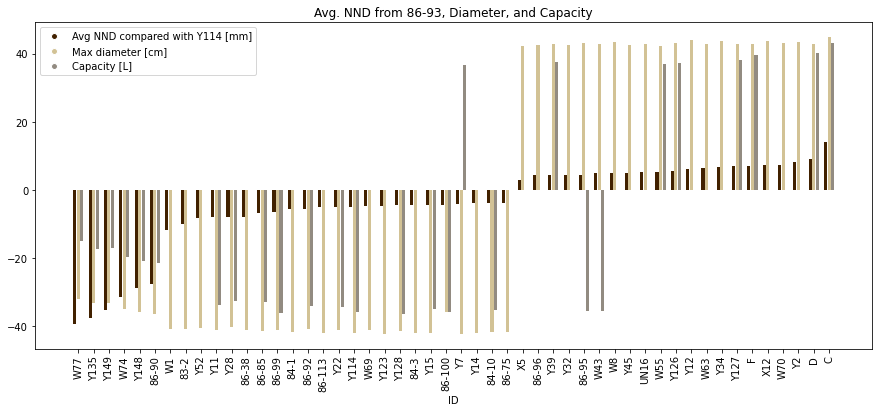

In [19]:
fig, ax = plt.subplots(figsize=(15,6))
x_pos = np.arange(len(compare_sorted))

w = 0.2
s = 0.03

colors = ['#d2c295', '#928b81']

ax.bar(x_pos-w-s, average_distances_sorted,width=w,color='#412100',align='center')
ax.bar(x_pos, diameters_sorted, width=w,color=colors[0],align='center')
ax.bar(x_pos+w+s, capacities_sorted, width=w,color=colors[1],align='center')

handle_list = [Line2D([0],[0], marker='o', color='w', markerfacecolor='#412100', label='Avg NND compared with Y114 [mm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=colors[0], label='Max diameter [cm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=colors[1], label='Capacity [L]')]
plt.legend(handles=handle_list, loc='upper left')
plt.xlabel('ID')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_title('Avg. NND from 86-93, Diameter, and Capacity')
plt.xticks(rotation='vertical')
plt.show()

Observations of the above: 
- There is one jar where shape and diameter are slightly smaller than ref shape and ref diameter, but capacity is slightly larger than ref capacity.
- There are two jars where shape and diameter are slightly larger than ref shape and ref diameter, but capacity is slightly smaller than ref capacity.
- This is not surprising, and other than that, all is as expected.

# Plot with delta max diam and delta capacity

(Volume data presented where available)

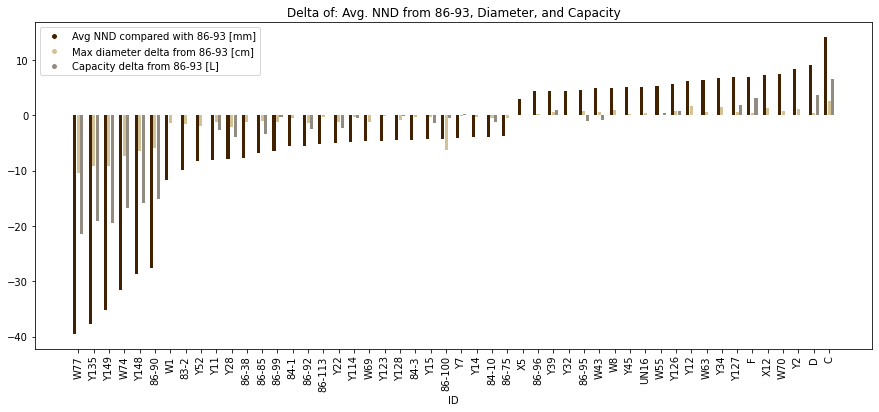

In [20]:
fig, ax = plt.subplots(figsize=(15,6))
x_pos = np.arange(len(compare_sorted))

w = 0.2
s = 0.03

colors = ['#d2c295', '#928b81']

ax.bar(x_pos-w-s, average_distances_sorted,width=w,color='#412100',align='center')
ax.bar(x_pos, diameters_sorted_deltas, width=w,color=colors[0],align='center')
ax.bar(x_pos+w+s, capacities_sorted_deltas, width=w,color=colors[1],align='center')

handle_list = [Line2D([0],[0], marker='o', color='w', markerfacecolor='#412100', label='Avg NND compared with 86-93 [mm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=colors[0], label='Max diameter delta from 86-93 [cm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=colors[1], label='Capacity delta from 86-93 [L]')]
plt.legend(handles=handle_list, loc='upper left')
plt.xlabel('ID')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_title('Delta of: Avg. NND from 86-93, Diameter, and Capacity')
plt.xticks(rotation='vertical')
plt.show()

In [21]:
print('\nmodel\taverage distance from %s [mm]\n' % ref)
for model, average_distance in zip(compare, average_distances):
    print(model, '\t', average_distance)


model	average distance from 86-93 [mm]

83-2 	 9.990988869644735
84-1 	 5.6191969241090005
84-3 	 4.405596347199213
84-10 	 3.977993031969717
86-38 	 7.820171253989147
86-75 	 3.8460478707494588
86-85 	 6.77964216498324
86-90 	 27.589254703459215
86-92 	 5.558637011421599
86-95 	 4.460995194640852
86-96 	 4.305866210636059
86-99 	 6.454599655521606
86-100 	 4.303266005723082
86-113 	 5.155962025277543
C 	 14.08033469154282
D 	 9.125578561804343
F 	 6.932331705726893
UN16 	 5.169707674141549
W1 	 11.702556657951869
W8 	 4.919034529287366
W43 	 4.8274485687308735
W55 	 5.314955390034178
W63 	 6.315111236415471
W69 	 4.672501430971396
W70 	 7.396533446784523
W74 	 31.510115939744672
W77 	 39.47029516056326
X5 	 2.857304794500756
X12 	 7.338804471301285
Y2 	 8.284294425654908
Y7 	 4.059896856664813
Y11 	 8.095919421076843
Y12 	 6.113986712515126
Y14 	 3.985392696556207
Y15 	 4.369315516685378
Y22 	 5.000075673029956
Y28 	 7.9257791244428795
Y32 	 4.408602518021583
Y34 	 6.690559867964883
